# Data Science London - Scikit-learn Meetup Competition

This notebook demonstrates my approach to the **Data Science London** competition using **Scikit-learn** for binary classification. The goal is to classify a synthetic dataset of 40 features, representing objects from two classes (labeled as `0` or `1`).

### Problem Overview:
- **Classification Task**: The goal of this competition is to predict the binary labels (`0` or `1`) of a dataset based on the given features.
- **Dataset**: The training set consists of **1000 samples**, and the testing set consists of **9000 samples**.
- **Evaluation Metric**: The model will be evaluated on **classification accuracy** – the percentage of labels predicted correctly.
- **Submission Format**: The output should include a **9000 x 1 vector** of predictions, along with an **ID column** (ranging from 1 to 9000). The required submission format is:

```plaintext
Id,Solution
1,0
2,1
3,1
...
9000,0


In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
col_names=[f"Col {i}" for i in range(1, 41)]
df=pd.read_csv("/kaggle/input/data-science-london-scikit-learn/train.csv",names=col_names)
label=pd.read_csv("/kaggle/input/data-science-london-scikit-learn/trainLabels.csv",names=["label"])


In [3]:
df.head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

Col 1     0
Col 2     0
Col 3     0
Col 4     0
Col 5     0
Col 6     0
Col 7     0
Col 8     0
Col 9     0
Col 10    0
Col 11    0
Col 12    0
Col 13    0
Col 14    0
Col 15    0
Col 16    0
Col 17    0
Col 18    0
Col 19    0
Col 20    0
Col 21    0
Col 22    0
Col 23    0
Col 24    0
Col 25    0
Col 26    0
Col 27    0
Col 28    0
Col 29    0
Col 30    0
Col 31    0
Col 32    0
Col 33    0
Col 34    0
Col 35    0
Col 36    0
Col 37    0
Col 38    0
Col 39    0
Col 40    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col 1   1000 non-null   float64
 1   Col 2   1000 non-null   float64
 2   Col 3   1000 non-null   float64
 3   Col 4   1000 non-null   float64
 4   Col 5   1000 non-null   float64
 5   Col 6   1000 non-null   float64
 6   Col 7   1000 non-null   float64
 7   Col 8   1000 non-null   float64
 8   Col 9   1000 non-null   float64
 9   Col 10  1000 non-null   float64
 10  Col 11  1000 non-null   float64
 11  Col 12  1000 non-null   float64
 12  Col 13  1000 non-null   float64
 13  Col 14  1000 non-null   float64
 14  Col 15  1000 non-null   float64
 15  Col 16  1000 non-null   float64
 16  Col 17  1000 non-null   float64
 17  Col 18  1000 non-null   float64
 18  Col 19  1000 non-null   float64
 19  Col 20  1000 non-null   float64
 20  Col 21  1000 non-null   float64
 21  Col 22  1000 non-null   float64
 22  C

In [7]:
df.describe()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [8]:
df=pd.concat([df,label],axis=1)


In [9]:
df.head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40,label
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


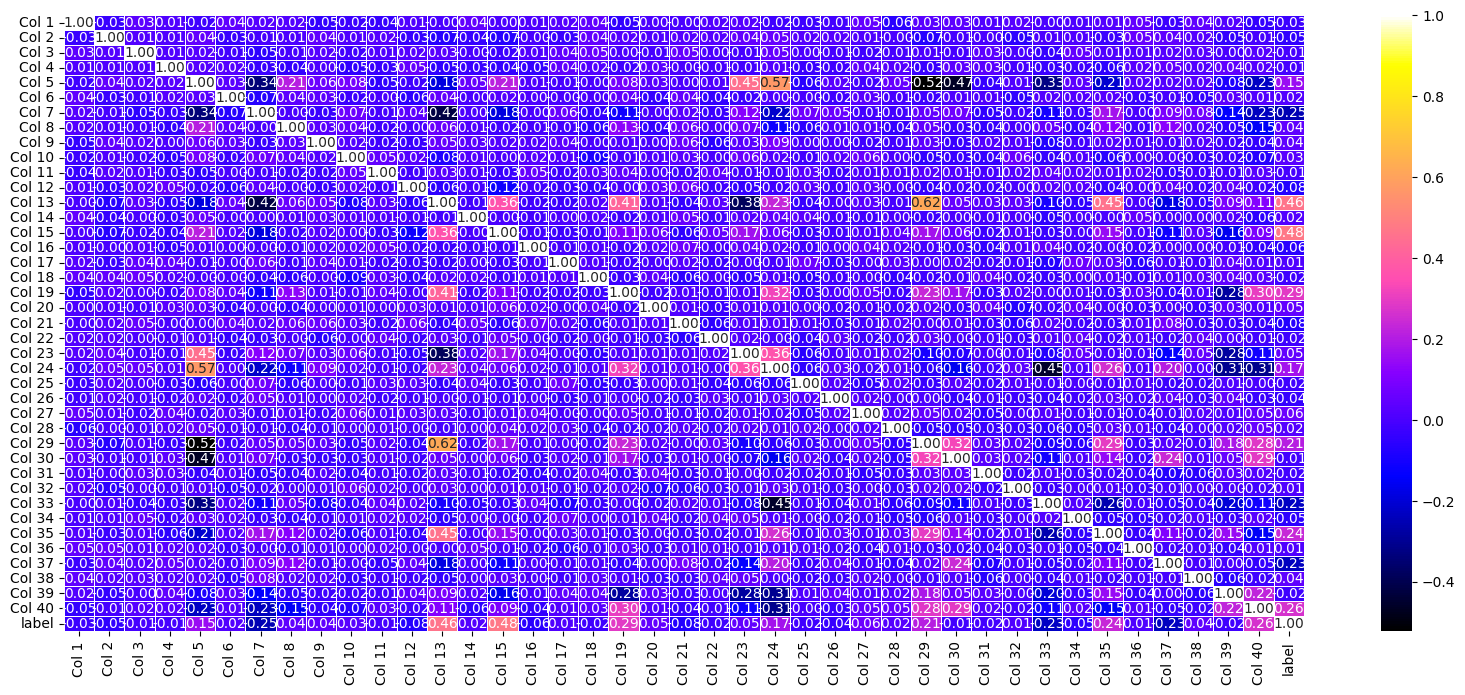

In [10]:
corr = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='gnuplot2', fmt='.2f', linewidths=0.5)
plt.show()

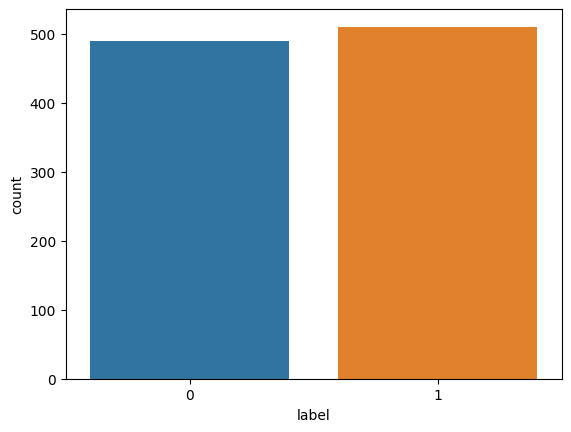

In [11]:
sns.countplot(x='label', data=df)
plt.show()

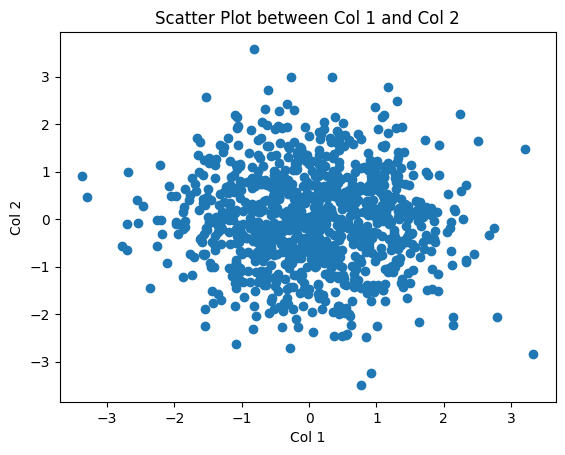

In [12]:
plt.scatter(df['Col 1'], df['Col 2'])
plt.xlabel('Col 1')
plt.ylabel('Col 2')
plt.title('Scatter Plot between Col 1 and Col 2')
plt.show()

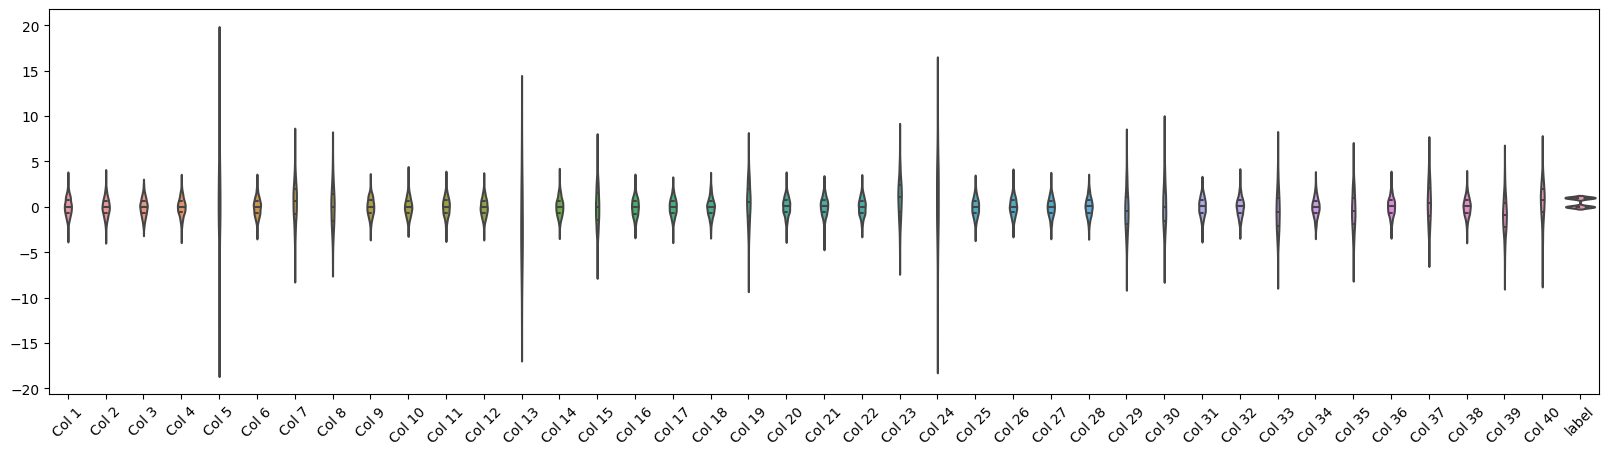

In [13]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df, inner="quart")
plt.xticks(rotation=45)
plt.show()

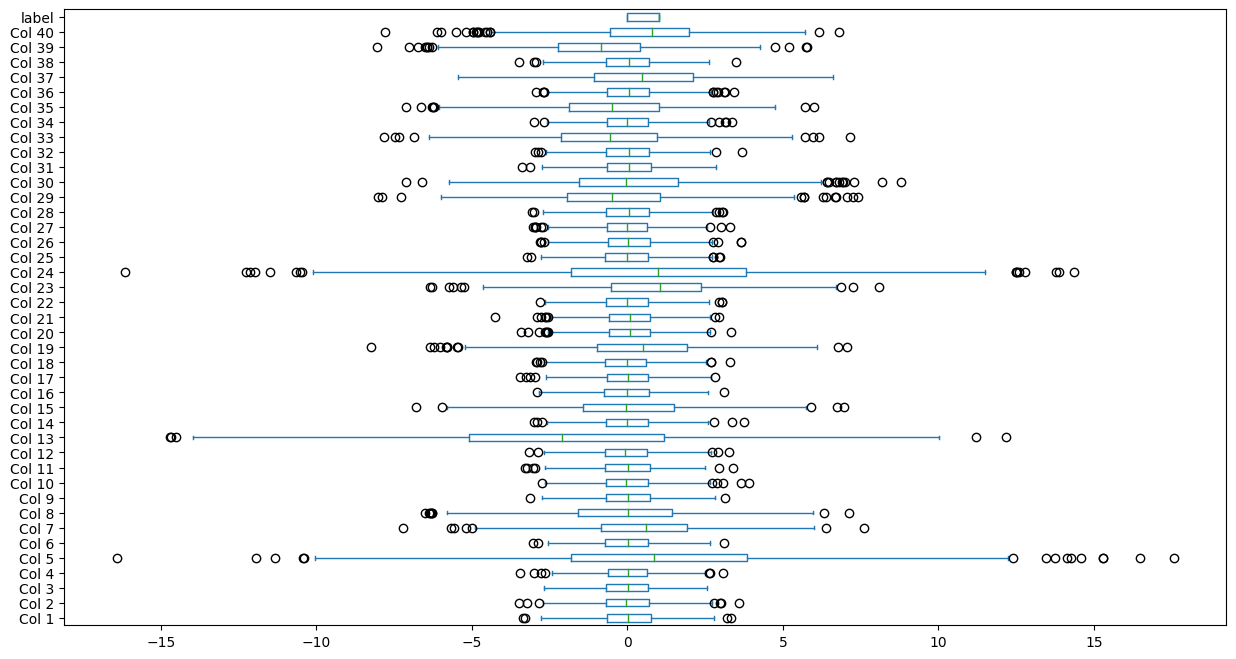

In [14]:
df.plot(kind='box', figsize=(15, 8), vert=False)
plt.show()


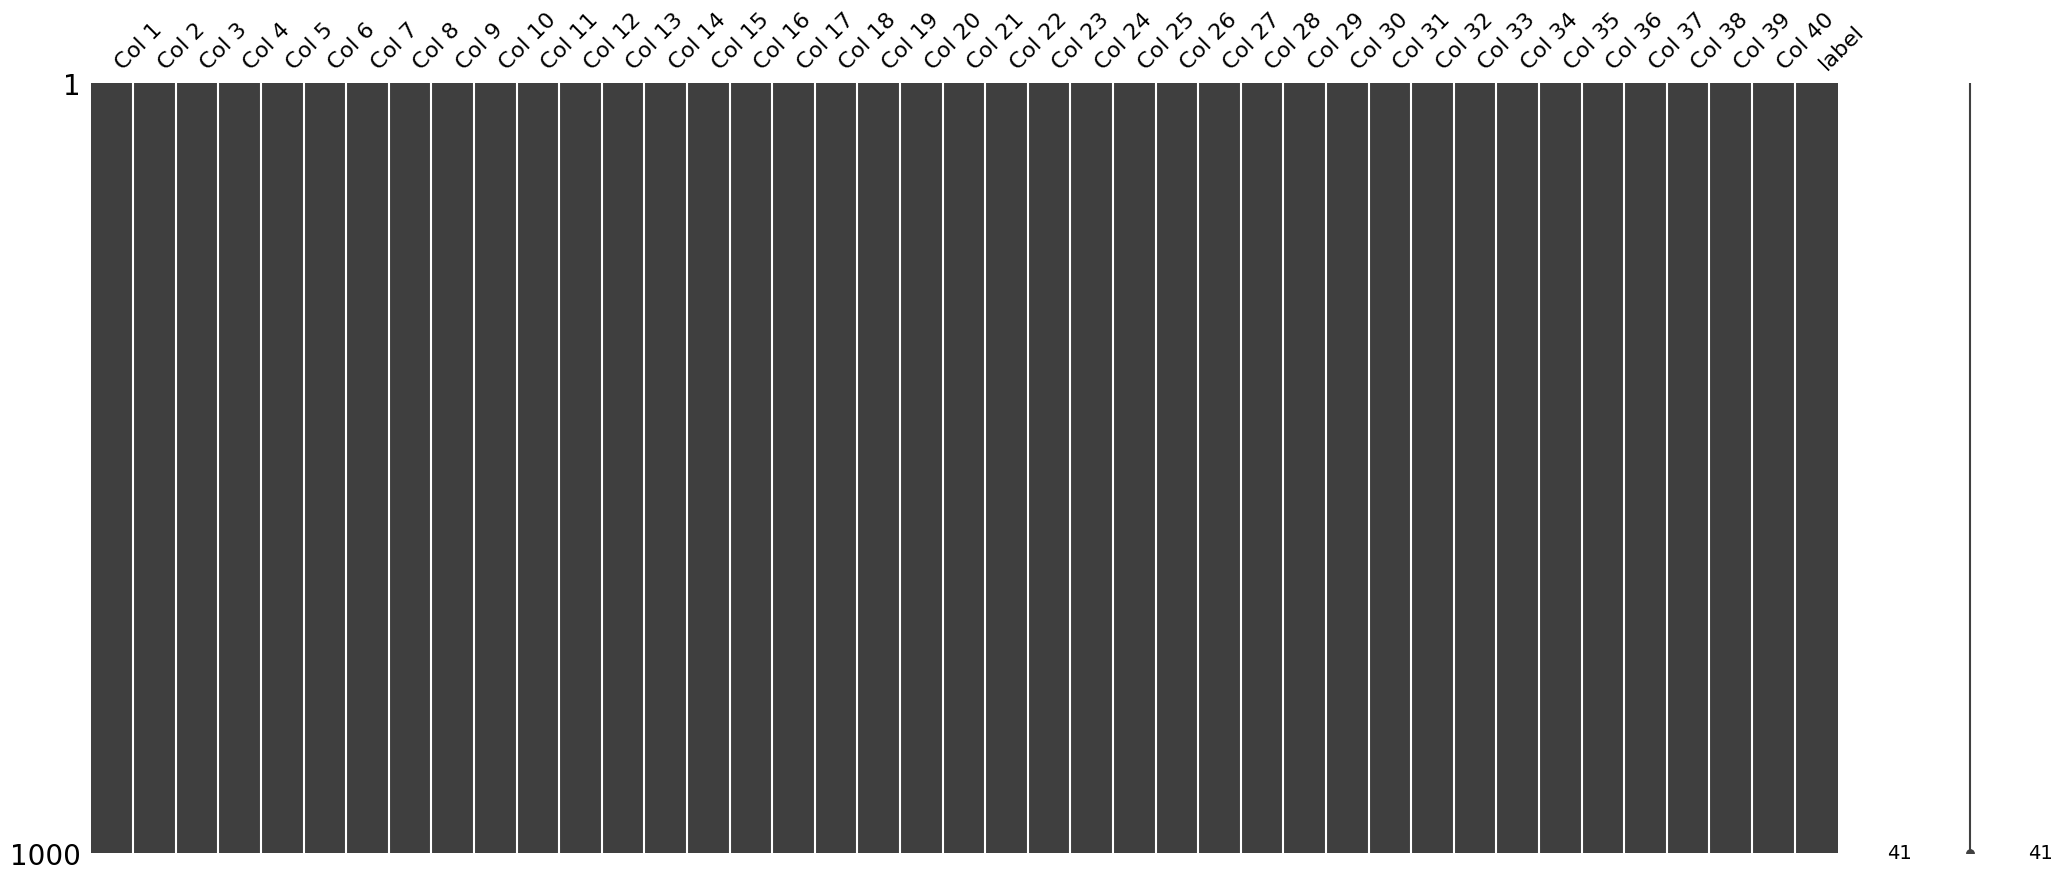

In [15]:
import missingno as msno
msno.matrix(df)
plt.show()

In [16]:
# correlation_matrix = df.corr()
# correlation_with_label = correlation_matrix['label'].sort_values(ascending=False)
# print(correlation_with_label.head(15))

# plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_with_label.index, y=correlation_with_label.values, palette='coolwarm')
# plt.title('Feature Correlation with Label')
# plt.xticks(rotation=90)
# plt.show()

In [17]:
df.head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40,label
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.iloc[:, :-1]  # All columns except the last column ('label')
y = df['label']      # The target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8700


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.8800


In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)

# Predict and evaluate
y_pred_ab = ab.predict(X_test)
ab_accuracy = accuracy_score(y_test, y_pred_ab)
print(f"AdaBoost Accuracy: {ab_accuracy:.4f}")


AdaBoost Accuracy: 0.7700


In [22]:
import xgboost as xgb

# Initialize and train XGBoost
xg = xgb.XGBClassifier(n_estimators=100, random_state=42)
xg.fit(X_train, y_train)

# Predict and evaluate
y_pred_xg = xg.predict(X_test)
xg_accuracy = accuracy_score(y_test, y_pred_xg)
print(f"XGBoost Accuracy: {xg_accuracy:.4f}")


XGBoost Accuracy: 0.8750


In [23]:
from catboost import CatBoostClassifier

# Initialize and train CatBoostClassifier
cb = CatBoostClassifier(iterations=5000, random_state=42, verbose=500,learning_rate=0.1)
cb.fit(X_train, y_train)

# Predict and evaluate
y_pred_cb = cb.predict(X_test)
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")


0:	learn: 0.6471103	total: 54.6ms	remaining: 4m 32s
500:	learn: 0.0027182	total: 2.38s	remaining: 21.3s
1000:	learn: 0.0021236	total: 4.6s	remaining: 18.4s
1500:	learn: 0.0020082	total: 6.83s	remaining: 15.9s
2000:	learn: 0.0019672	total: 9.05s	remaining: 13.6s
2500:	learn: 0.0019300	total: 11.3s	remaining: 11.3s
3000:	learn: 0.0018901	total: 13.6s	remaining: 9.06s
3500:	learn: 0.0018417	total: 15.8s	remaining: 6.78s
4000:	learn: 0.0018213	total: 18.5s	remaining: 4.61s
4500:	learn: 0.0018030	total: 20.7s	remaining: 2.29s
4999:	learn: 0.0017656	total: 23s	remaining: 0us
CatBoost Accuracy: 0.9000


# Compare Model Results

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


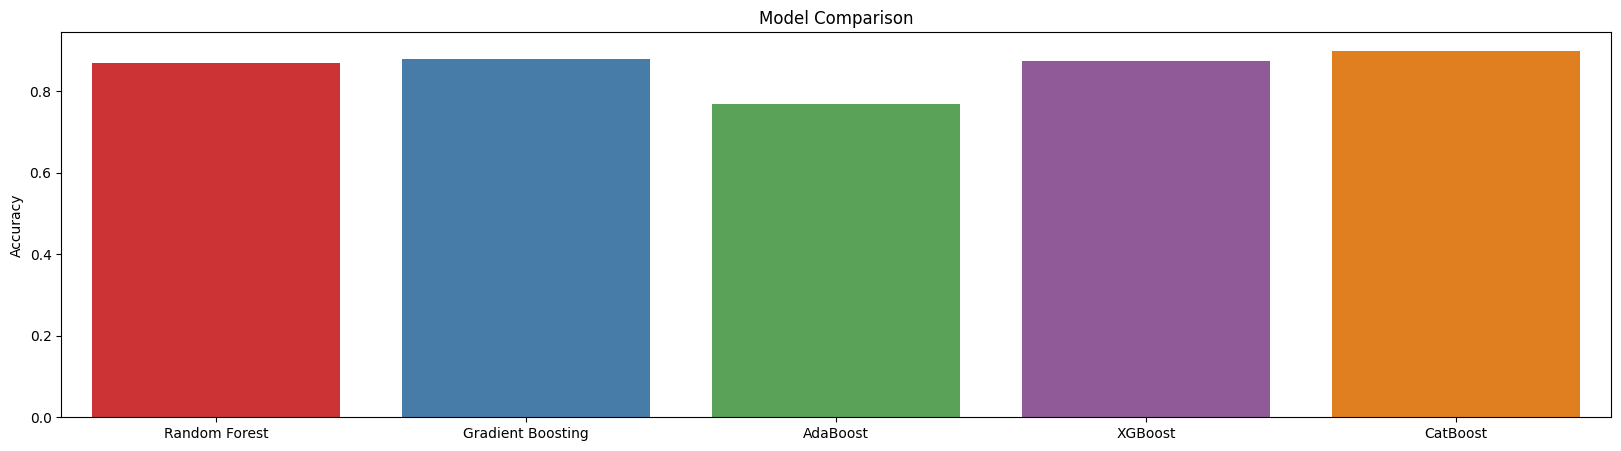

In [24]:
# Store all accuracies
accuracies = {
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,
    'AdaBoost': ab_accuracy,
    'XGBoost': xg_accuracy,
    'CatBoost': cb_accuracy
}

# Plotting the comparison of model accuracies
models = list(accuracies.keys())
scores = list(accuracies.values())

plt.figure(figsize=(20, 5))
sns.barplot(x=models, y=scores, palette='Set1')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()


# Read_Test Data

In [25]:
df_test=pd.read_csv("/kaggle/input/data-science-london-scikit-learn/test.csv",names=col_names)
df_test.reset_index(drop=True, inplace=True)
df_test.head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [26]:
df_test.shape

(9000, 40)

In [27]:
df_test.head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [28]:
prediction=cb.predict(df_test)
my_id = range(1, len(prediction) + 1)
my_submission=pd.DataFrame({"Id":my_id,"Solution":prediction})
my_submission.to_csv("submission.csv",index=False)

In [29]:
my_submission.head()

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [30]:
my_submission.shape

(9000, 2)